In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [12]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [13]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [14]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [34]:
len(dataset)

68

In [35]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
    print(label_batch.numpy())

tf.Tensor(
[[[198. 200. 212.]
  [200. 202. 214.]
  [197. 199. 211.]
  ...
  [122. 123. 141.]
  [161. 162. 180.]
  [134. 135. 153.]]

 [[194. 196. 208.]
  [195. 197. 209.]
  [192. 194. 206.]
  ...
  [137. 138. 156.]
  [144. 145. 163.]
  [120. 121. 139.]]

 [[185. 187. 199.]
  [189. 191. 203.]
  [190. 192. 204.]
  ...
  [153. 154. 172.]
  [144. 145. 163.]
  [137. 138. 156.]]

 ...

 [[177. 179. 192.]
  [174. 176. 189.]
  [172. 174. 187.]
  ...
  [142. 140. 153.]
  [133. 131. 144.]
  [128. 126. 139.]]

 [[178. 180. 193.]
  [174. 176. 189.]
  [171. 173. 186.]
  ...
  [107. 105. 118.]
  [124. 122. 135.]
  [106. 104. 117.]]

 [[176. 178. 191.]
  [171. 173. 186.]
  [168. 170. 183.]
  ...
  [118. 116. 129.]
  [131. 129. 142.]
  [106. 104. 117.]]], shape=(256, 256, 3), dtype=float32)
[0 1 1 0 0 1 1 0 0 2 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 2 0 1 1 1]


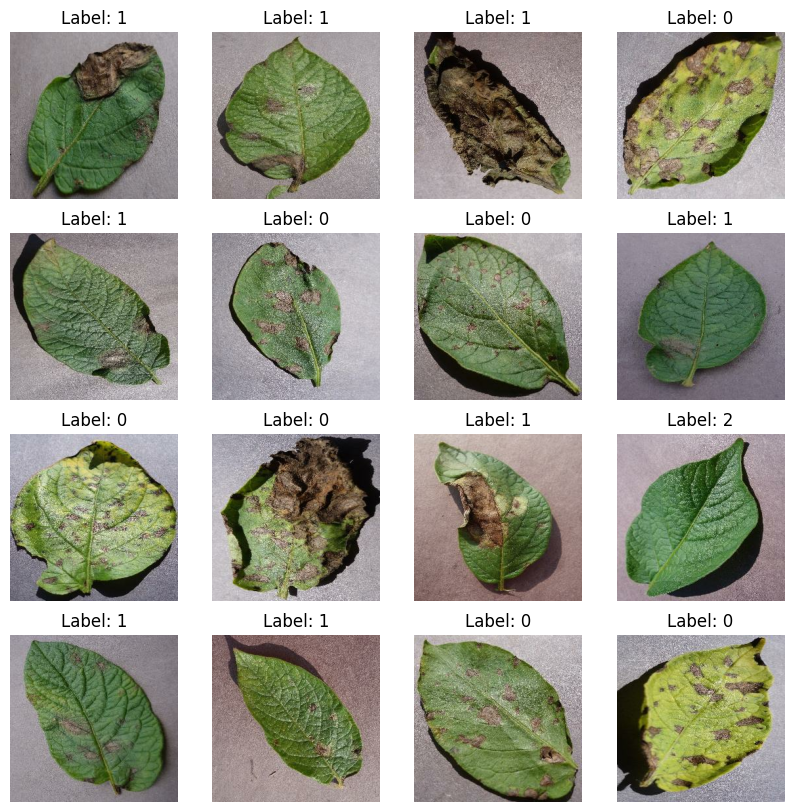

In [36]:

for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    num_images = min(len(image_batch), 16)  # Display at most 16 images
    for i in range(num_images):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(f"Label: {label_batch[i]}")
        plt.axis("off")
    plt.show()


In [17]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [18]:
train_ds = dataset.take(54)
len(train_ds)

54

In [19]:
test_ds = dataset.skip(54)
print(len(test_ds))

14


In [20]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [21]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [22]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [24]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
      
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size ).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [25]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)
len(train_ds)
len(val_ds)

6

In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 256)
])


In [47]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Example usage
input_image = tf.random.normal([1, 300, 300, 3])
output_image = data_augmentation(input_image)
print(output_image.shape)

(1, 300, 300, 3)


In [48]:
# Constants
IMAGE_SIZE = 256
CHANNELS = 3

# Define the input layer
inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=tf.float32)  # Specify the data type

# Build the model
n_classes = 3

model = tf.keras.Sequential([
    inputs,  # Add the input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Summarize the model
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [50]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 539ms/step - accuracy: 0.4414 - loss: 3.5811 - val_accuracy: 0.6979 - val_loss: 0.6985
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 419ms/step - accuracy: 0.6995 - loss: 0.6727 - val_accuracy: 0.8177 - val_loss: 0.4081
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 433ms/step - accuracy: 0.8377 - loss: 0.3784 - val_accuracy: 0.9167 - val_loss: 0.2653
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 467ms/step - accuracy: 0.9357 - loss: 0.1982 - val_accuracy: 0.8490 - val_loss: 0.3049
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 495ms/step - accuracy: 0.9106 - loss: 0.2318 - val_accuracy: 0.9479 - val_loss: 0.1298
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 500ms/step - accuracy: 0.9539 - loss: 0.1388 - val_accuracy: 0.9844 - val_loss: 0.0856
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 478ms/step - accuracy: 0.9430 - loss: 0.1366 - val_accuracy: 0.9531 - val_loss: 0.1333
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 457ms/step - accuracy: 0.9608 - loss: 0.1106 - val_accu

In [51]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.9918 - loss: 0.0885


In [52]:
scores

[0.10349811613559723, 0.98828125]

In [53]:
history

In [54]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [55]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

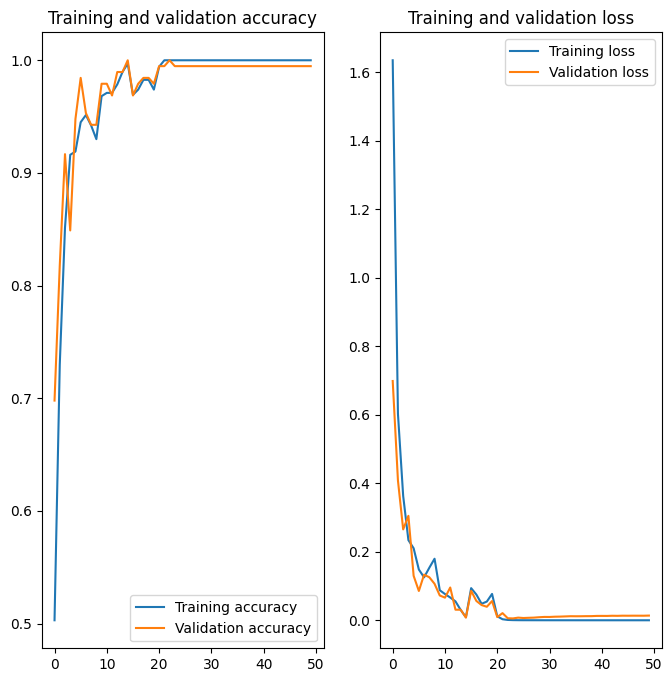

In [57]:
# Assuming you have the following variables:
# acc: Training accuracy values (list)
# val_acc: Validation accuracy values (list)
# loss: Training loss values (list)
# val_loss: Validation loss values (list)
# EPOCHS: Number of epochs

plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')

plt.show()


first image to predict
 actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
predicted label :  Potato___Late_blight


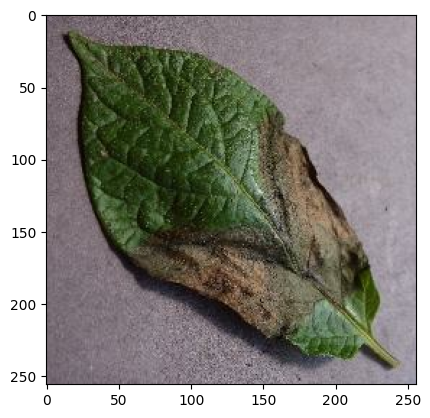

In [58]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print(" actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label : " ,class_names[np.argmax(batch_prediction[0])])

In [59]:
def predict(model, img):
    img_array = tf.keras.processing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0 )  #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


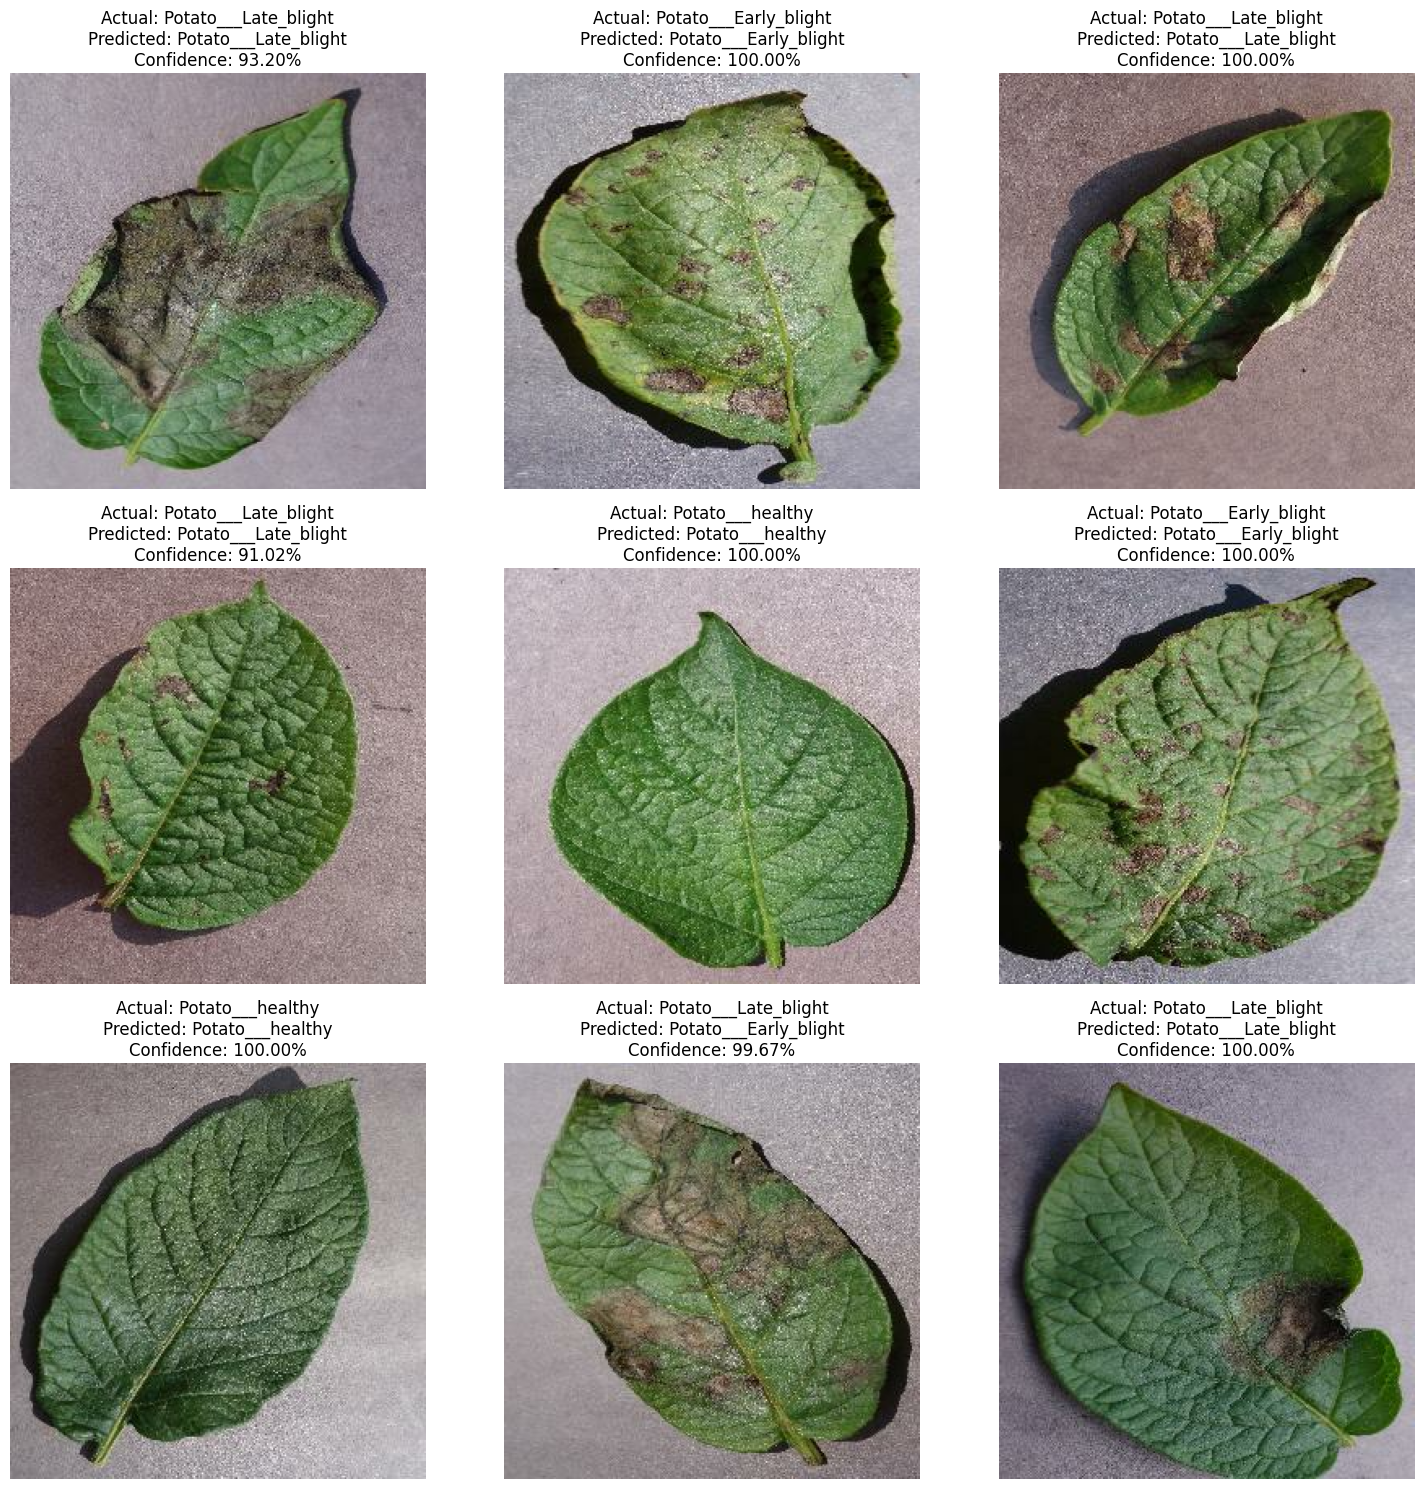

In [60]:
# Assuming test_ds is your test dataset and class_names is a list of class names
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    predictions = model.predict(images)  # Predict probabilities for each image batch

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class = class_names[predictions[i].argmax()]  # Get the class with the highest probability
        actual_class = class_names[labels[i]]
        confidence = predictions[i].max() * 100  # Calculate confidence as a percentage

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.axis("off")

plt.tight_layout()
plt.show()

In [4]:
import tensorflow as tf
model_version = 2
model_path = f'C:/New folder/VScode/python/potato-disease-classification/models/2.keras'
model = tf.keras.models.load_model(model_path)
model.save(f'C:/New folder/VScode/python/potato-disease-classification/models/{model_version}.keras')


In [6]:
model = tf.keras.models.load_model(model_path)


In [29]:
# Log the model summary in Flask app to ensure it's the same model
print(model.summary())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,243 (2.10 MB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 367,496 (1.40 MB)

None


In [7]:

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch dimension
    img_array = img_array / 255.0  # Rescale to [0,1]
    return img_array


In [9]:
class_names = ['late', 'early' ,'healthy']

def predict_image(model, img_path, class_names):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Example usage
img_path = r'potato\early.JPG'
predicted_class, confidence = predict_image(model, img_path, class_names)

print(f"Predicted class: {predicted_class} with confidence: {confidence}%")


NameError: name 'image' is not defined

In [84]:

with open('class_names.py', 'w') as f:
    f.write(f'class_names = {class_names}')